In [1]:
from utils import *

In [2]:
# Set Hyper Parameters directly in the script
look_back = 50
look_ahead = 30
neuron1 = 70
neuron2 = 70
neuron3 = 70
timestep = 60

validation_split = 0.8  # Percentage of train set from the whole dataset
nb_epochs = 1000        # Number of iterations in the training phase
batch_size = 10         # Number of samples per gradient update
delete_percentage = {1: 4000, 60: 100}

In [3]:
series = read_data(path="C:/Users/smsoo/Downloads/newcnproject/dataset_and_preprocess/fdata_throughput")
times  = list(range(len(series)))

In [4]:
del_percentage = delete_percentage[timestep]
times , series = times[:-del_percentage], series[:-del_percentage]

In [5]:
from sklearn.preprocessing import scale
original_series = series.copy()
series_mean, series_std = series.mean(), series.std()
series = scale(series).reshape(len(series), 1)

In [6]:
print(series_mean)
print(series_std)

11696639.313548004
4915670.188839178


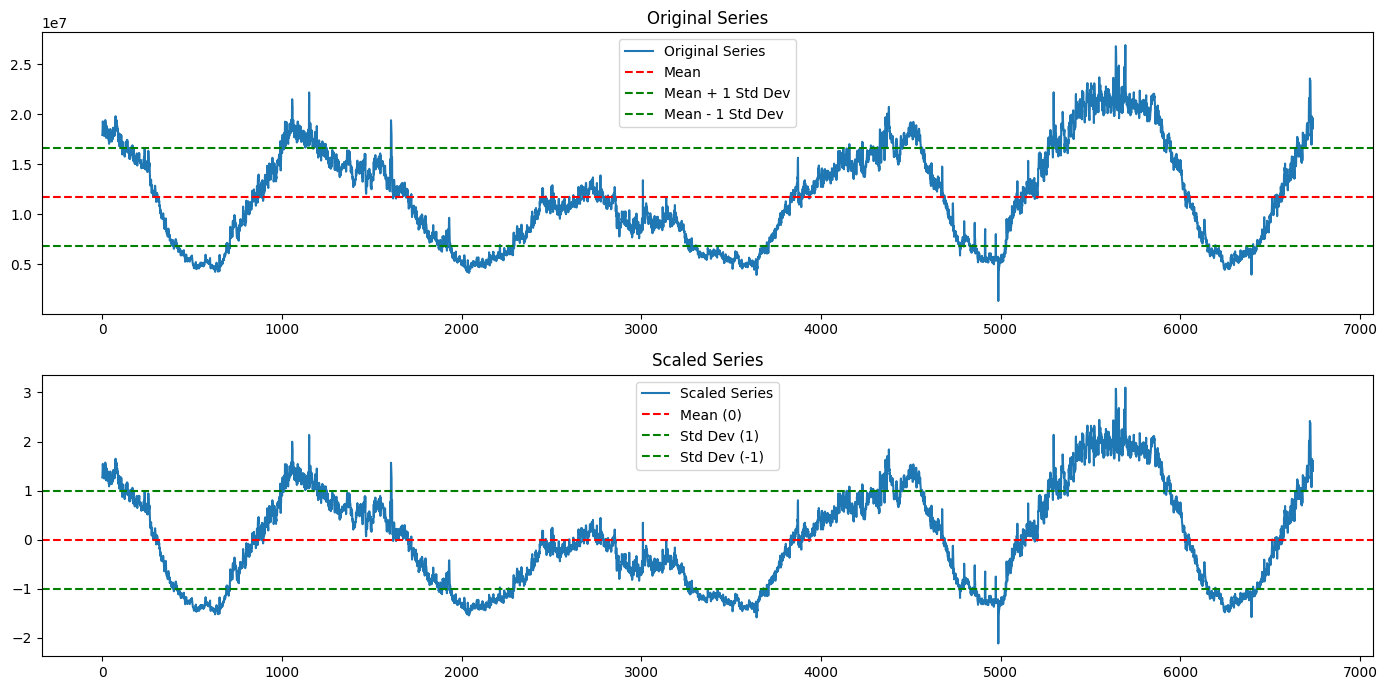

In [7]:
scaled_series = series

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(original_series, label='Original Series')
plt.axhline(y=series_mean, color='r', linestyle='--', label='Mean')
plt.axhline(y=series_mean + series_std, color='g', linestyle='--', label='Mean + 1 Std Dev')
plt.axhline(y=series_mean - series_std, color='g', linestyle='--', label='Mean - 1 Std Dev')
plt.title('Original Series')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(scaled_series, label='Scaled Series')
plt.axhline(y=0, color='r', linestyle='--', label='Mean (0)')
plt.axhline(y=1, color='g', linestyle='--', label='Std Dev (1)')
plt.axhline(y=-1, color='g', linestyle='--', label='Std Dev (-1)')
plt.title('Scaled Series')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
train , test = train_test_split(series, validation_split)

train_x, train_y = create_datasets(train, look_back, look_ahead)
test_x, test_y = create_datasets(test, look_back, look_ahead)

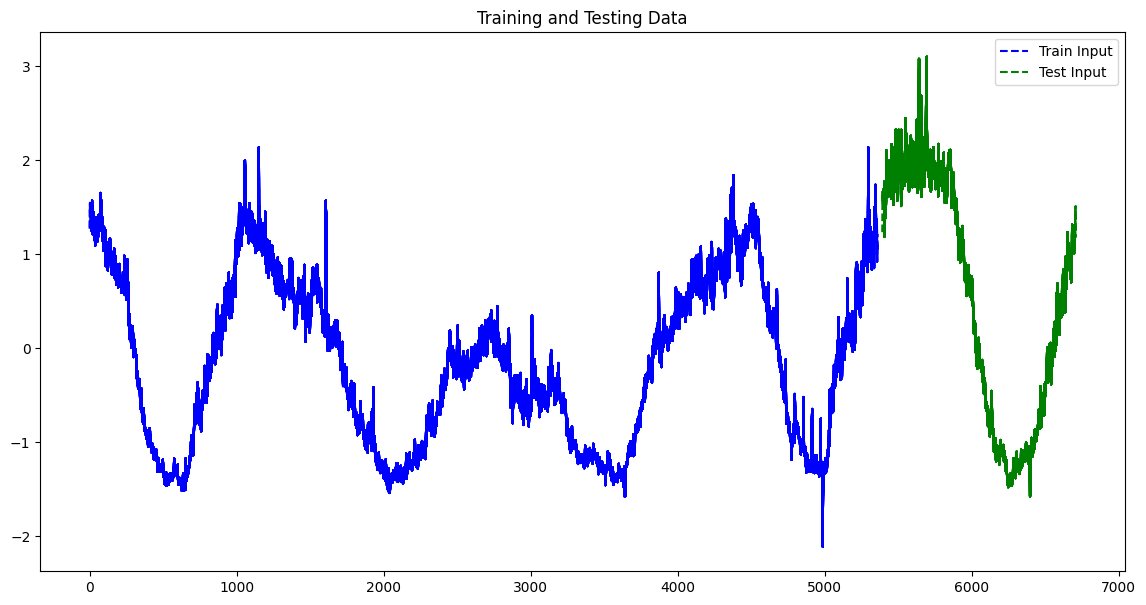

In [9]:
plt.figure(figsize=(14, 7))

for i in range(len(train_x)):
    plt.plot(range(i, i + look_back), train_x[i], 'b--', label='Train Input' if i == 0 else "")

for i in range(len(test_x)): 
    plt.plot(range(len(train) + i, len(train) + i + look_back), test_x[i], 'g--', label='Test Input' if i == 0 else "")
plt.title('Training and Testing Data')
plt.legend()
plt.show()

In [10]:
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
train_y = np.reshape(train_y, (train_y.shape[0], train_y.shape[1], 1))

test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
test_y = np.reshape(test_y, (test_y.shape[0], test_y.shape[1], 1))

In [11]:
'''
# Define a custom Keras regressor class
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, optimizer='adam', epochs=100, batch_size=10, verbose=0):
        self.optimizer = optimizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(LSTM(50,return_sequences=True,input_shape=(30,5)))
        model.add(LSTM(50))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer=self.optimizer)
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Define the grid search parameters
param_grid = {
    'epochs': [50, 100],
    'batch_size': [10, 20],
    'optimizer': ['adam', 'rmsprop']
}

# Create the GridSearchCV object
model = CustomKerasRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search
grid_result = grid.fit(trainX, trainY)

# Print the best parameters and best score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
'''

'\n# Define a custom Keras regressor class\nclass CustomKerasRegressor(BaseEstimator, RegressorMixin):\n    def __init__(self, optimizer=\'adam\', epochs=100, batch_size=10, verbose=0):\n        self.optimizer = optimizer\n        self.epochs = epochs\n        self.batch_size = batch_size\n        self.verbose = verbose\n        self.model = None\n\n    def build_model(self):\n        model = Sequential()\n        model.add(LSTM(50,return_sequences=True,input_shape=(30,5)))\n        model.add(LSTM(50))\n        model.add(Dropout(0.2))\n        model.add(Dense(1))\n        model.compile(loss=\'mean_squared_error\', optimizer=self.optimizer)\n        return model\n\n    def fit(self, X, y):\n        self.model = self.build_model()\n        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)\n        return self\n\n    def predict(self, X):\n        return self.model.predict(X)\n\n# Define the grid search parameters\nparam_grid = {\n    \'epochs\': [

In [12]:
model = Sequential()
model.add(GRU(neuron1, input_shape=(None, 1))) 
model.add(RepeatVector(look_ahead))
model.add(GRU(neuron2, return_sequences=True))
model.add(GRU(neuron3, return_sequences=True))
model.add(GRU(neuron1, return_sequences=True))
model.add(GRU(neuron1, return_sequences=True))
model.add(TimeDistributed(Dense(1)))

model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

c:\Users\smsoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 70)             │        15,330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 70)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 30, 70)         │        29,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 30, 70)         │        29,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 30, 70)         │        29,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 30, 70)         │        29,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 1)          │            71 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,681 (526.10 KB)

 Trainable params: 134,681 (526.10 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    train_x,
    train_y,
    epochs=nb_epochs,
    batch_size=batch_size,
    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3, verbose=2, mode='auto')],
    validation_split=validation_split,
    verbose=2
)

Epoch 1/1000
107/107 - 14s - 130ms/step - loss: 0.1202 - mape: 83.3893 - val_loss: 0.0503 - val_mape: 137.2540
Epoch 2/1000
107/107 - 7s - 64ms/step - loss: 0.0483 - mape: 77.0908 - val_loss: 0.0416 - val_mape: 130.7145
Epoch 3/1000
107/107 - 7s - 68ms/step - loss: 0.0403 - mape: 76.3221 - val_loss: 0.0425 - val_mape: 137.3228
Epoch 4/1000
107/107 - 8s - 77ms/step - loss: 0.0381 - mape: 74.4692 - val_loss: 0.0372 - val_mape: 125.5117
Epoch 5/1000
107/107 - 8s - 71ms/step - loss: 0.0377 - mape: 74.7805 - val_loss: 0.0373 - val_mape: 128.8098
Epoch 6/1000
107/107 - 8s - 77ms/step - loss: 0.0374 - mape: 74.9801 - val_loss: 0.0382 - val_mape: 132.8441
Epoch 7/1000
107/107 - 8s - 75ms/step - loss: 0.0411 - mape: 75.6937 - val_loss: 0.0451 - val_mape: 141.5954
Epoch 7: early stopping


In [14]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)


test_loss, test_accuracy = model.evaluate(test_x, test_y, verbose=0)

pred_train = reverse_scale(pred_train, series_mean, series_std)
pred_test = reverse_scale(pred_test, series_mean, series_std)
test_y = reverse_scale(test_y, series_mean, series_std)
train_y = reverse_scale(train_y, series_mean, series_std)


166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


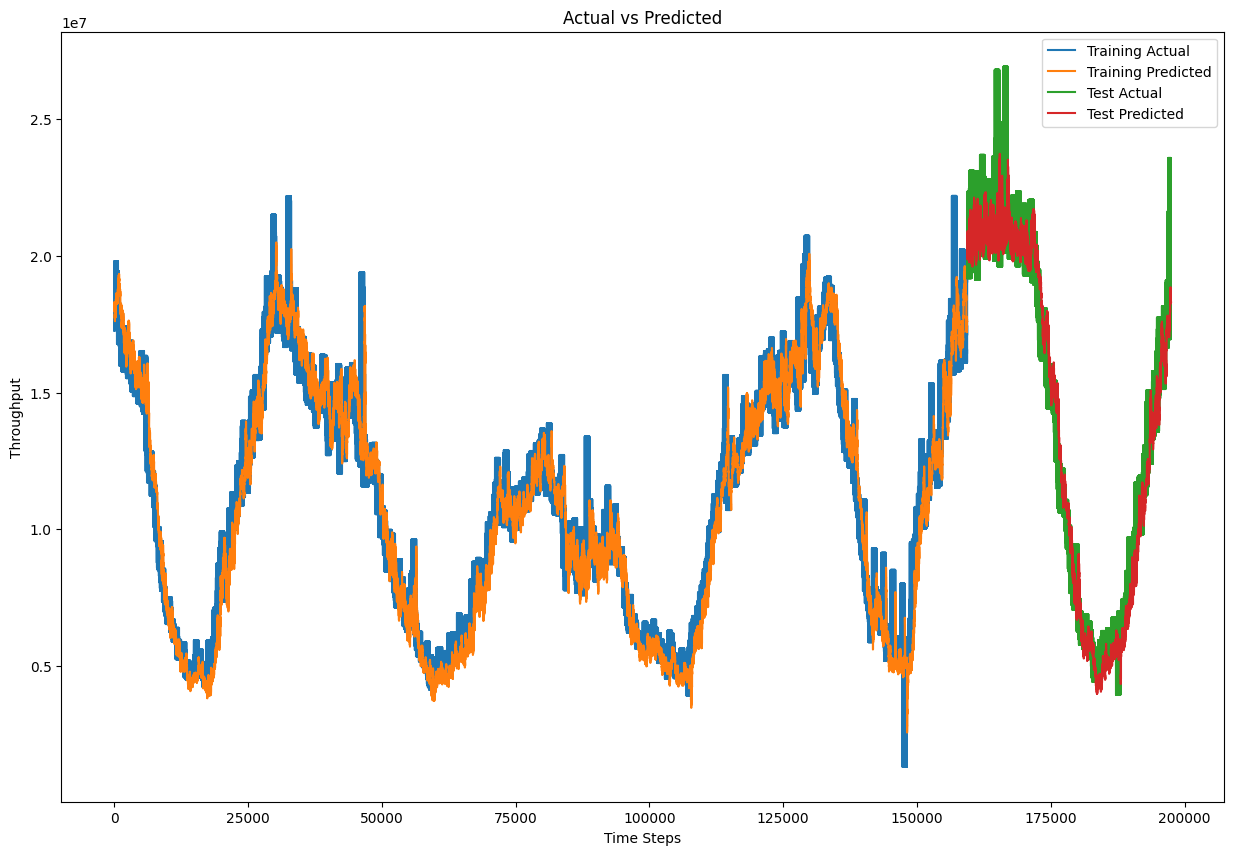

In [16]:
plt.figure(figsize=(15, 10))

plt.plot(range(len(train_y.flatten())), train_y.flatten(), label='Training Actual')
plt.plot(range(len(train_y.flatten())), pred_train.flatten(), label='Training Predicted')
plt.plot(range(len(train_y.flatten()), len(train_y.flatten()) + len(test_y.flatten())), test_y.flatten(), label='Test Actual')
plt.plot(range(len(train_y.flatten()), len(train_y.flatten()) + len(pred_test.flatten())), pred_test.flatten(), label='Test Predicted')

plt.title('Actual vs Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Throughput')
plt.legend()
plt.show()